In [135]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [136]:
Dataset=pd.read_csv('/content/drive/MyDrive/Blood_tansfusion_data.data')

In [137]:
Dataset.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [138]:
Dataset.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)
Dataset.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1


In [139]:
Dataset.target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

In [140]:
Dataset.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [141]:
X=Dataset.drop(columns='target')
Y=Y[:748]
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [142]:
X['Monetary (c.c. blood)']=np.log(X['Monetary (c.c. blood)'])

In [143]:
X.var().round(3)

Recency (months)          65.535
Frequency (times)         34.098
Monetary (c.c. blood)      0.836
Time (months)            594.224
dtype: float64

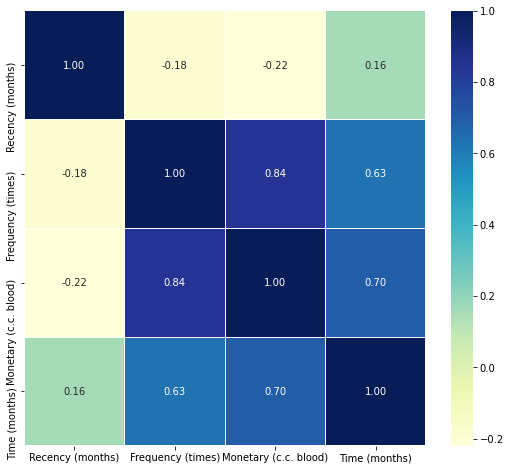

In [144]:
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

In [145]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(X)

In [175]:
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
n_features= 4
MLP= MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=300)
logreg = LogisticRegression(random_state=7)
SVMC = SVC(probability=True)
RFC = RandomForestClassifier()
DTC=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [176]:
models=[]
models.append(('LR', logreg))
models.append(('RFC', RFC))
models.append(('DTC', DTC))
models.append(('SVC', SVMC))
models.append(('MLP', MLP))

In [177]:
results=[]
names = []
from sklearn import model_selection
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.787441 (0.051751)
RFC: 0.735279 (0.042671)
DTC: 0.791423 (0.026939)
SVC: 0.782108 (0.040359)
MLP: 0.791477 (0.045726)


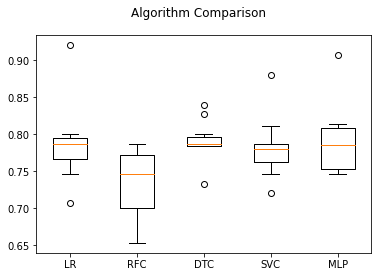

In [178]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()